In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x : '%.4f' % x)
import sys
sys.path.append('..')
from SRC import sp_limpieza as sl
from SRC import sp_visual as sv
from SRC import sp_nulos_num as snulos

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
df=pd.read_csv('../Data/mktgeda_datos_limpios.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209915 entries, 0 to 209914
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   campaign_id       209915 non-null  int64  
 1   company           209915 non-null  object 
 2   campaign_type     209915 non-null  object 
 3   duration          191309 non-null  float64
 4   channel_used      209915 non-null  object 
 5   conversion_rate   209915 non-null  float64
 6   roi               209915 non-null  float64
 7   location          209915 non-null  object 
 8   language          209915 non-null  object 
 9   clicks            209915 non-null  float64
 10  impressions       209915 non-null  float64
 11  engagement_score  209915 non-null  float64
 12  customer_segment  209915 non-null  object 
 13  date              209915 non-null  object 
 14  total($)          209915 non-null  float64
 15  genre             209915 non-null  object 
 16  ages              20

### Métricas a generar
- CTR
- CPC
- CPM
- CPE
- Conversion Cost
- Conversion Value
- Engagement Rate
- Impression per dolar
- Campaign success
- CLV (impressions)

In [4]:
df['CTR']=df['clicks']/df['impressions']
df['CPC']=df['total($)']/df['clicks']
df['CPM']=df['total($)']/df['impressions']*1000
df['CPE']=df['total($)']/df['engagement_score']
df['conversion_cost']=df['total($)']/df['conversion_rate']
df['conversion_value']=df['conversion_rate']/df['roi']
df['engagement_rate']=df['engagement_score']/df['impressions']
df['impressions_per_$']=df['impressions']/df['total($)']
df['is_successful']=df['roi'].apply(lambda x: 1 if x > 5 else 0)
df['CLV']=df['roi']*df['conversion_rate']*df['impressions']


In [5]:
df.columns

Index(['campaign_id', 'company', 'campaign_type', 'duration', 'channel_used',
       'conversion_rate', 'roi', 'location', 'language', 'clicks',
       'impressions', 'engagement_score', 'customer_segment', 'date',
       'total($)', 'genre', 'ages', 'year', 'month', 'day_name', 'quarter',
       'CTR', 'CPC', 'CPM', 'CPE', 'conversion_cost', 'conversion_value',
       'engagement_rate', 'impressions_per_$', 'is_successful', 'CLV'],
      dtype='object')

In [6]:
df_metricas=df[['CTR', 'CPC', 'CPE', 'conversion_cost', 'conversion_value',
       'engagement_rate', 'impressions_per_$',  'CPM', 'is_successful', 'CLV']]

In [7]:
df_metricas.describe().round(4)

,CTR,CPC,CPE,conversion_cost,conversion_value,engagement_rate,impressions_per_$,CPM,is_successful,CLV
count,209915.0000,209915.0000,209915.0000,209915.0000,209915.0000,209915.0000,209915.0000,209915.0000,209915.0000,209915.0000
mean,31.5979,13.6441,1791.2706,242384.5703,0.0090,0.0089,2531.8867,1438.7044,0.7941,60861699.9147
std,81.1023,23.6583,2995.4979,262389.6238,0.0115,0.0458,3278.5355,2406.3710,0.4044,121587332.1612
min,0.0000,0.0050,4.9525,33062.7063,0.0001,0.0000,0.0503,0.0501,0.0000,25.3422
25%,0.0028,0.0248,176.6705,102503.5361,0.0016,0.0000,0.4794,0.2396,1.0000,7171.0570
50%,0.0208,0.0626,595.9091,154720.2274,0.0036,0.0000,1476.5682,0.6772,1.0000,6506798.6148
75%,22.1315,19.8270,2047.6667,266351.9566,0.0133,0.0030,4173.4071,2086.0140,1.0000,61959384.1896
max,991.0398,199.6100,20000.0000,2000000.0000,0.0758,1.0080,19946.0950,19896.1039,1.0000,1164259229.5695


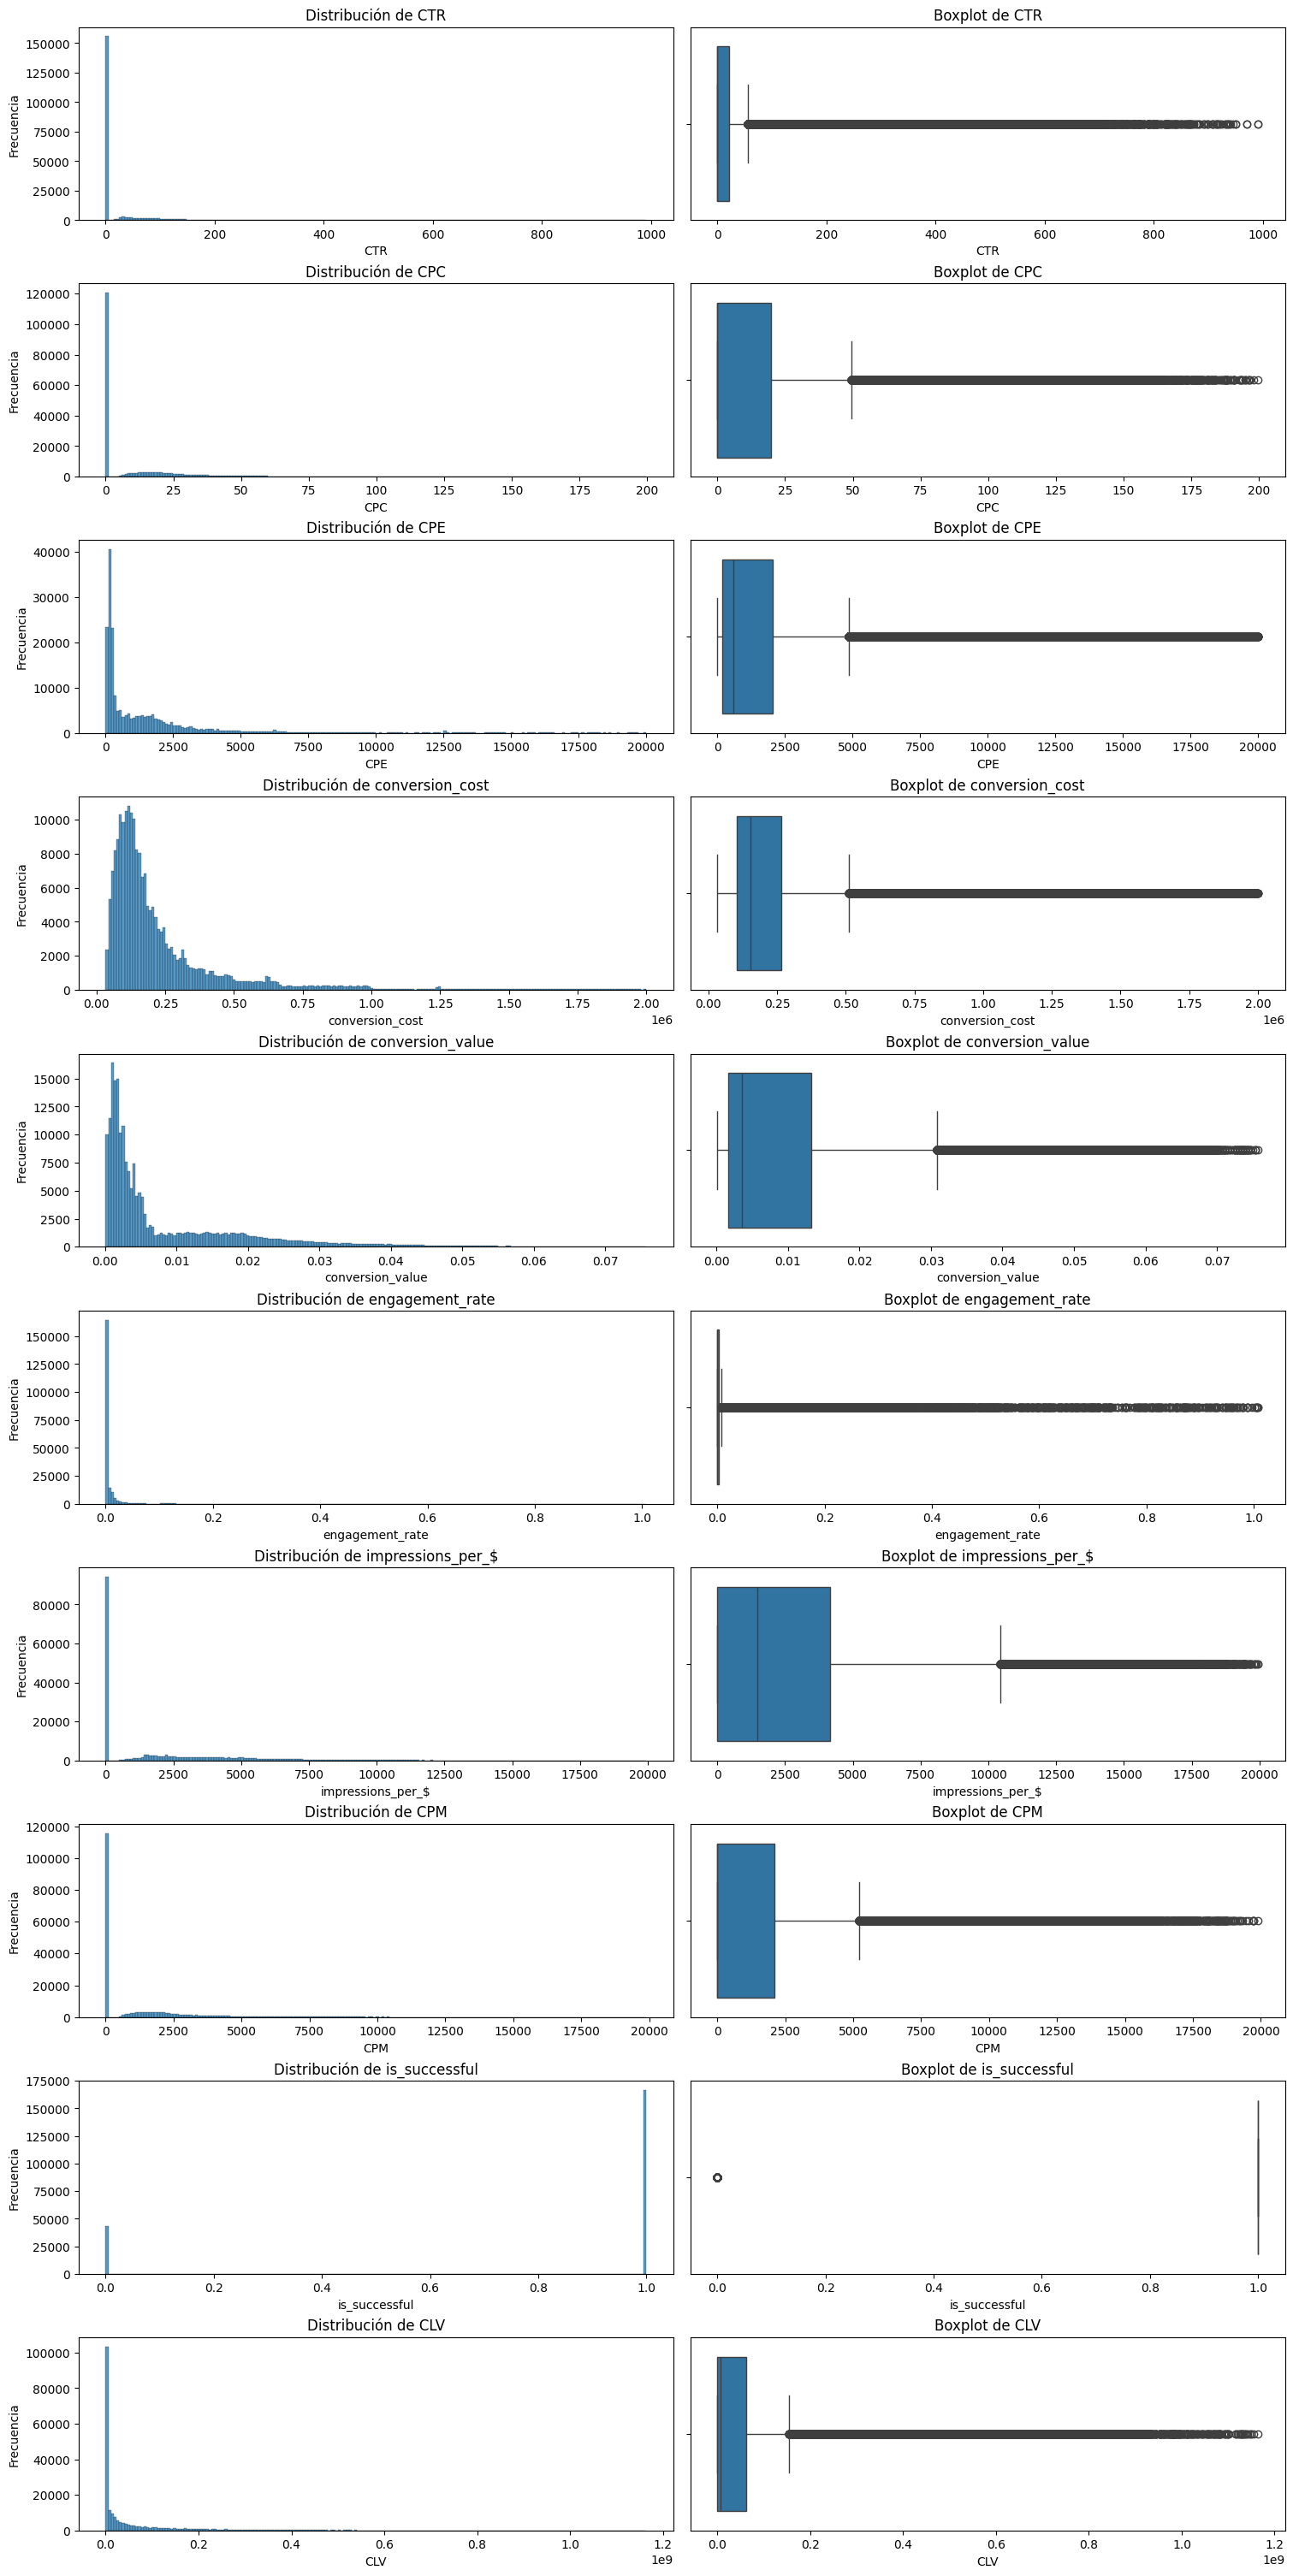

In [8]:
sv.subplot_col_num_2(df_metricas,df_metricas.columns)

In [9]:
df.to_csv('../Data/mktgeda_metricas.csv',index=False)